In [1]:
# info()로 데이터 살펴보기
import pandas as pd
import numpy as np

## 데이터프레임 생성
d = pd.DataFrame(
    {"date": ["2019-01-03", "2021-11-22", "2023-01-05"], "name": ["J", "Y", "O"]}
)
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    3 non-null      object
 1   name    3 non-null      object
dtypes: object(2)
memory usage: 180.0+ bytes


In [2]:
## datetime()으로 변환
d["date"] = pd.to_datetime(d["date"], format="%Y-%m-%d")
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    3 non-null      datetime64[ns]
 1   name    3 non-null      object        
dtypes: datetime64[ns](1), object(1)
memory usage: 180.0+ bytes


In [3]:
## datetime을 인덱스로 설정
d.set_index(keys=['date'], inplace=True)
print(d)

           name
date           
2019-01-03    J
2021-11-22    Y
2023-01-05    O


In [4]:
import numpy as np

## 결측치 확인

## 예제 데이터프레임 생성
d = pd.DataFrame(
    {
        "date": ["2019-01-03", "2021-11-22", "2021-12-01", "2023-01-05"],
        "x1": [0.1, 2.0, np.nan, 1.2],
    }
)

d.isnull().sum()

date    0
x1      1
dtype: int64

In [5]:
# 이전 값으로 결측치 채우기
d = d.fillna(method='ffill')
d

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_3484\2317339533.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  d = d.fillna(method='ffill')


,date,x1
0,2019-01-03,0.1
1,2021-11-22,2.0
2,2021-12-01,2.0
3,2023-01-05,1.2


In [6]:
# 결측치 해당 행 삭제

## 예제 데이터프레임 생성
d = pd.DataFrame(
    {
        "date": ["2019-01-03", "2021-11-22", "2021-12-01", "2023-01-05"],
        "x1": [0.1, 2.0, np.nan, 1.2],
    }
)

d = d.dropna()
d

,date,x1
0,2019-01-03,0.1
1,2021-11-22,2.0
3,2023-01-05,1.2


In [7]:
# 결측치 전후 값의 평균으로 결측값 채우기

## 예제 데이터프레임 생성
d = pd.DataFrame(
    {
        "date": ["2019-01-03", "2021-11-22", "2021-12-01", "2023-01-05"],
        "x1": [0.1, 2.0, np.nan, 1.2],
    }
)

d = d.interpolate()
d

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_3484\1912551933.py:11: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  d = d.interpolate()


,date,x1
0,2019-01-03,0.1
1,2021-11-22,2.0
2,2021-12-01,1.6
3,2023-01-05,1.2


In [8]:
# 빈도 설정

## 예제 데이터프레임 생성
d = pd.DataFrame(
    {
        "date": ["2019-01-03", "2021-11-22", "2021-12-01", "2023-01-05"],
        "x1": [0.1, 2.0, 6, 1.2],
    }
)

d["date"] = pd.to_datetime(d["date"])
d.set_index(keys=["date"], inplace=True)
d.index

DatetimeIndex(['2019-01-03', '2021-11-22', '2021-12-01', '2023-01-05'], dtype='datetime64[ns]', name='date', freq=None)

In [9]:
d2 = d.asfreq(freq="Y", method='ffill')
d2

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_3484\2683121137.py:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  d2 = d.asfreq(freq="Y", method='ffill')


,x1
date,
2019-12-31,0.1
2020-12-31,0.1
2021-12-31,6.0
2022-12-31,6.0


In [10]:
# 특정량 만들기

## 예제 데이터프레임 생성
d = pd.DataFrame(
    {
        "date": [
            "2021-01-06",
            "2021-01-13",
            "2021-01-20",
            "2021-01-27",
            "2021-02-03",
        ],
        "x1": [5, 4, 3, 2, 7],
    }
)
d["date"] = pd.to_datetime(d["date"])
d.set_index(keys=["date"], inplace=True)
print("원본")
print("="*20)
print(d)
print("="*20)
tmp = d.rolling(1).mean()
print(tmp)
print("="*20)
tmp = d.rolling(2).mean()
print(tmp)

원본
            x1
date          
2021-01-06   5
2021-01-13   4
2021-01-20   3
2021-01-27   2
2021-02-03   7
             x1
date           
2021-01-06  5.0
2021-01-13  4.0
2021-01-20  3.0
2021-01-27  2.0
2021-02-03  7.0
             x1
date           
2021-01-06  NaN
2021-01-13  4.5
2021-01-20  3.5
2021-01-27  2.5
2021-02-03  4.5


In [11]:
# 동일한 컬럼 값으로 채우기

print("원본")
print("="*20)
print(d)
y_diff = d.diff()
y_diff.columns = ['diff']
temp = pd.concat([d, y_diff], axis=1)
print("="*20)
print(temp)

원본
            x1
date          
2021-01-06   5
2021-01-13   4
2021-01-20   3
2021-01-27   2
2021-02-03   7
            x1  diff
date                
2021-01-06   5   NaN
2021-01-13   4  -1.0
2021-01-20   3  -1.0
2021-01-27   2  -1.0
2021-02-03   7   5.0


In [12]:
# 지연값 추출
print("원본")
print("="*20)
print(d)
d['Shift'] = d['x1'].shift(2)
print(d)
print("="*20)
d = d.fillna(method='bfill')
print(d)

원본
            x1
date          
2021-01-06   5
2021-01-13   4
2021-01-20   3
2021-01-27   2
2021-02-03   7
            x1  Shift
date                 
2021-01-06   5    NaN
2021-01-13   4    NaN
2021-01-20   3    5.0
2021-01-27   2    4.0
2021-02-03   7    3.0
            x1  Shift
date                 
2021-01-06   5    5.0
2021-01-13   4    5.0
2021-01-20   3    5.0
2021-01-27   2    4.0
2021-02-03   7    3.0


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_3484\1694479911.py:8: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  d = d.fillna(method='bfill')


In [13]:
# 원-핫 인코딩
df = pd.DataFrame({"color": ["red", "blue", "green", "blue", "red"]})

one_hot = pd.get_dummies(df["color"])

one_hot

,blue,green,red
0,False,False,True
1,True,False,False
2,False,True,False
3,True,False,False
4,False,False,True


In [14]:
pip install plotly

In [15]:
pip install beautifulsoup4

Note: you may need to restart the kernel to use updated packages.


In [16]:
pip install finance-DataReader

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import FinanceDataReader as fdr

# 2022년도부터 애플 주식 데이터를 불러오기
df = fdr.DataReader("AAPL", "2022") # DataReader()의 파라미터에 '종목 코드', '시작 일자', '종료 일자'를 차례대로 추가

df.head()

,Open,High,Low,Close,Volume,Adj Close
2021-12-31,178.089996,179.229996,177.259995,177.570007,64062300,174.708176
2022-01-03,177.830002,182.880005,177.710007,182.009995,104487900,179.076584
2022-01-04,182.630005,182.940002,179.119995,179.699997,99310400,176.803833
2022-01-05,179.610001,180.169998,174.639999,174.919998,94537600,172.100845
2022-01-06,172.699997,175.300003,171.639999,172.000000,96904000,169.227936


In [20]:
import FinanceDataReader as fdr

df = fdr.StockListing("NASDAQ")
df.head()


100%|██████████| 3660/3660 [00:03<00:00, 1103.54it/s]


,Symbol,Name,IndustryCode,Industry
0,AAPL,Apple Inc,57106020,전화 및 소형 장치
1,NVDA,NVIDIA Corp,57101010,반도체
2,MSFT,Microsoft Corp,57201020,소프트웨어
3,AMZN,Amazon.com Inc,53402010,백화점
4,META,Meta Platforms Inc,57201030,온라인 서비스


In [17]:
df = fdr.StockListing("KRX")
df.head()

,Code,ISU_CD,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId
0,005930,KR7005930003,삼성전자,KOSPI,,53000,2,-100,-0.19,52700,53100,51900,24674774,1292090449863,316398475150000,5969782550,STK
1,000660,KR7000660001,SK하이닉스,KOSPI,,168500,2,-6500,-3.71,174100,174800,167100,4487308,759899327600,122668398502500,728002365,STK
2,373220,KR7373220003,LG에너지솔루션,KOSPI,,357500,2,-14500,-3.90,375000,377000,356000,359300,130623036000,83655000000000,234000000,STK
3,207940,KR7207940008,삼성바이오로직스,KOSPI,,939000,2,-19000,-1.98,947000,948000,908000,100460,93549203000,66832386000000,71174000,STK
4,005380,KR7005380001,현대차,KOSPI,,210500,2,-1500,-0.71,210500,211500,206000,704962,147106838500,44082108205500,209416191,STK


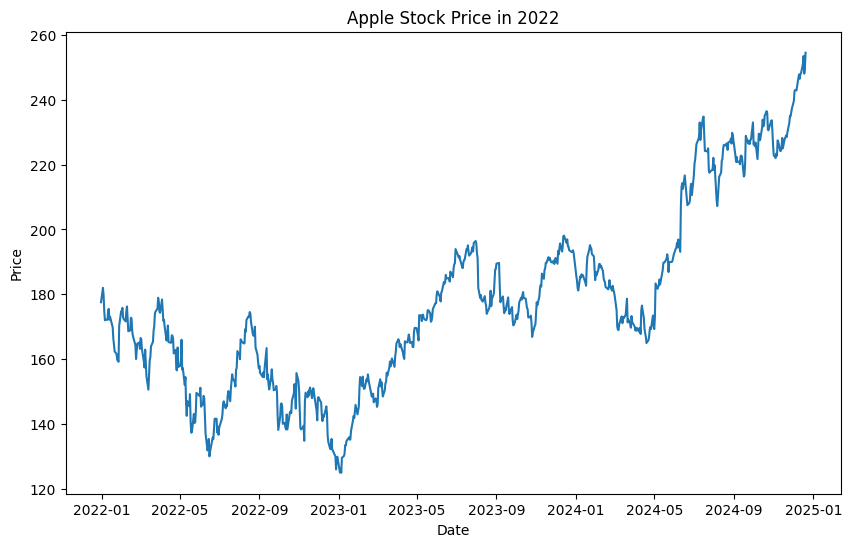

In [46]:
# 2022년도부터 애플 주식 데이터를 불러오기
df = fdr.DataReader("AAPL", "2022") # DataReader()의 파라미터에 '종목 코드', '시작 일자', '종료 일자'를 차례대로 추가

# 주식 가격 시각화하기
plt.figure(figsize=(10, 6))
sns.lineplot(x=df.index, y=df["Close"])
plt.title("Apple Stock Price in 2022")
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [54]:
# resample()을 이용하여 다운샘플링
df_month = df.resample("BM").mean()
df_month

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_18912\922990415.py:2: FutureWarning: 'BM' is deprecated and will be removed in a future version, please use 'BME' instead.
  df_month = df.resample("BM").mean()


,Open,High,Low,Close,Volume,Adj Close
2021-12-31,178.089996,179.229996,177.259995,177.570007,6.406230e+07,174.708145
2022-01-31,170.201500,172.447999,167.639500,169.861500,1.054223e+08,167.123888
2022-02-28,169.635262,171.585263,167.580524,169.830001,8.565875e+07,167.271255
2022-03-31,164.806956,167.164348,162.939131,165.310435,9.481740e+07,162.853394
2022-04-29,167.479001,169.518501,165.083002,166.820999,8.438978e+07,164.341502
2022-05-31,148.324286,150.950952,145.364284,148.430477,1.143353e+08,146.395041
2022-06-30,139.945714,141.919047,138.111430,139.798573,8.329047e+07,137.923061
2022-07-29,148.436499,150.766000,147.141500,149.670499,7.235627e+07,147.662551
2022-08-31,166.956522,168.589566,165.533913,166.885218,6.566259e+07,164.836091
2022-09-30,153.284286,155.308573,150.893333,153.002856,9.927251e+07,151.159884


In [56]:
# pct_change()를 이용하여 수익률 구하기

df_month['rtn'] = df_month['Close'].pct_change()
df_month.head()

,Open,High,Low,Close,Volume,Adj Close,rtn
2021-12-31,178.089996,179.229996,177.259995,177.570007,6.406230e+07,174.708145,NaN
2022-01-31,170.201500,172.447999,167.639500,169.861500,1.054223e+08,167.123888,-0.043411
2022-02-28,169.635262,171.585263,167.580524,169.830001,8.565875e+07,167.271255,-0.000185
2022-03-31,164.806956,167.164348,162.939131,165.310435,9.481740e+07,162.853394,-0.026612
2022-04-29,167.479001,169.518501,165.083002,166.820999,8.438978e+07,164.341502,0.009138


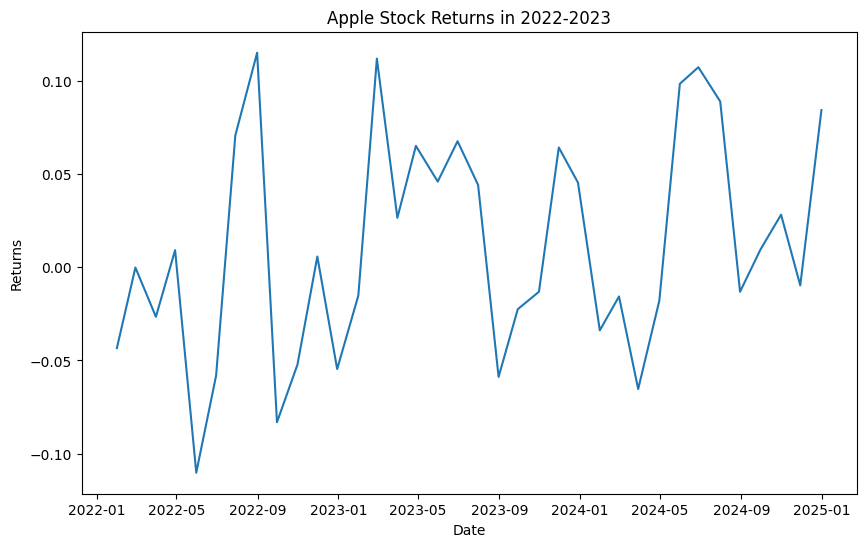

In [ ]:
# 수익률 시각화
plt.figure(figsize=(10, 6))
sns.lineplot(x=df_month.index, y=df_month["rtn"])
plt.title("Apple Stock Returns in 2022-2023")
plt.xlabel("Date")
plt.ylabel("Returns")

plt.show()

In [59]:
# 주가 흐름 파악하기

## 2달씩 종가로 이동평균 구하기
df_month["MA"] = df_month["Close"].rolling(2).mean()
df_month.head()

,Open,High,Low,Close,Volume,Adj Close,rtn,MA
2021-12-31,178.089996,179.229996,177.259995,177.570007,6.406230e+07,174.708145,NaN,NaN
2022-01-31,170.201500,172.447999,167.639500,169.861500,1.054223e+08,167.123888,-0.043411,173.715754
2022-02-28,169.635262,171.585263,167.580524,169.830001,8.565875e+07,167.271255,-0.000185,169.845750
2022-03-31,164.806956,167.164348,162.939131,165.310435,9.481740e+07,162.853394,-0.026612,167.570218
2022-04-29,167.479001,169.518501,165.083002,166.820999,8.438978e+07,164.341502,0.009138,166.065717


<Axes: >

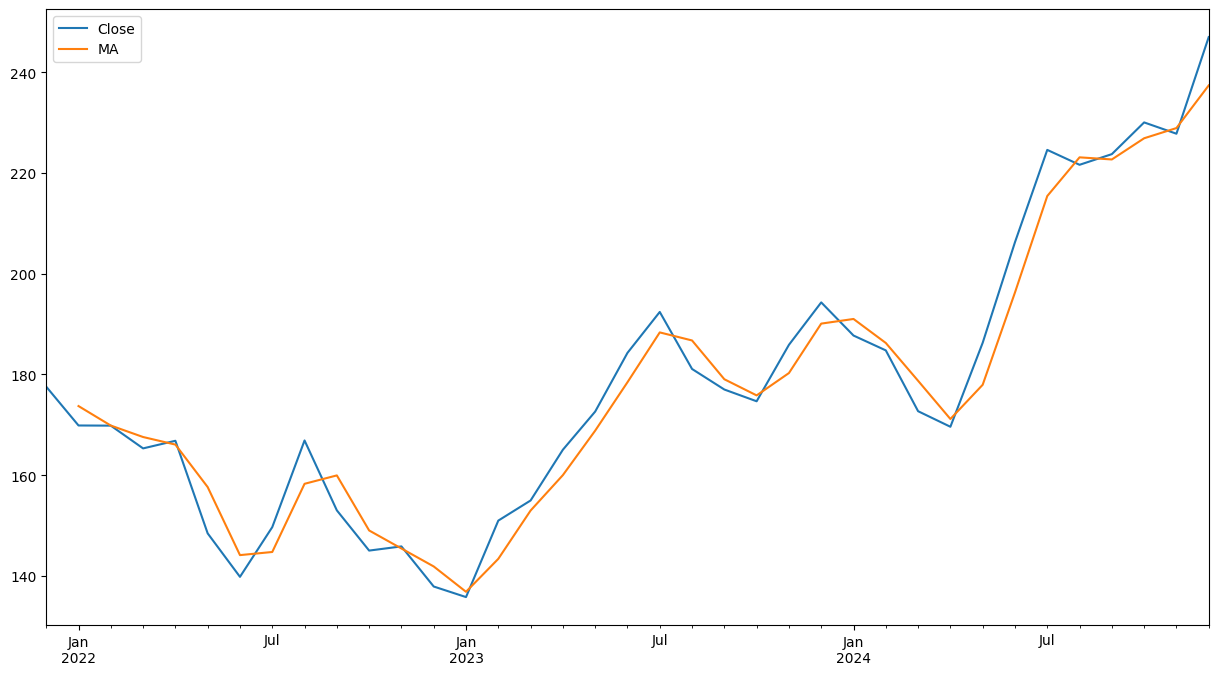

In [66]:
# 이동평균선 시각화
df_month.iloc[:, [3, 7]].plot(figsize=(15, 8))

<Axes: >

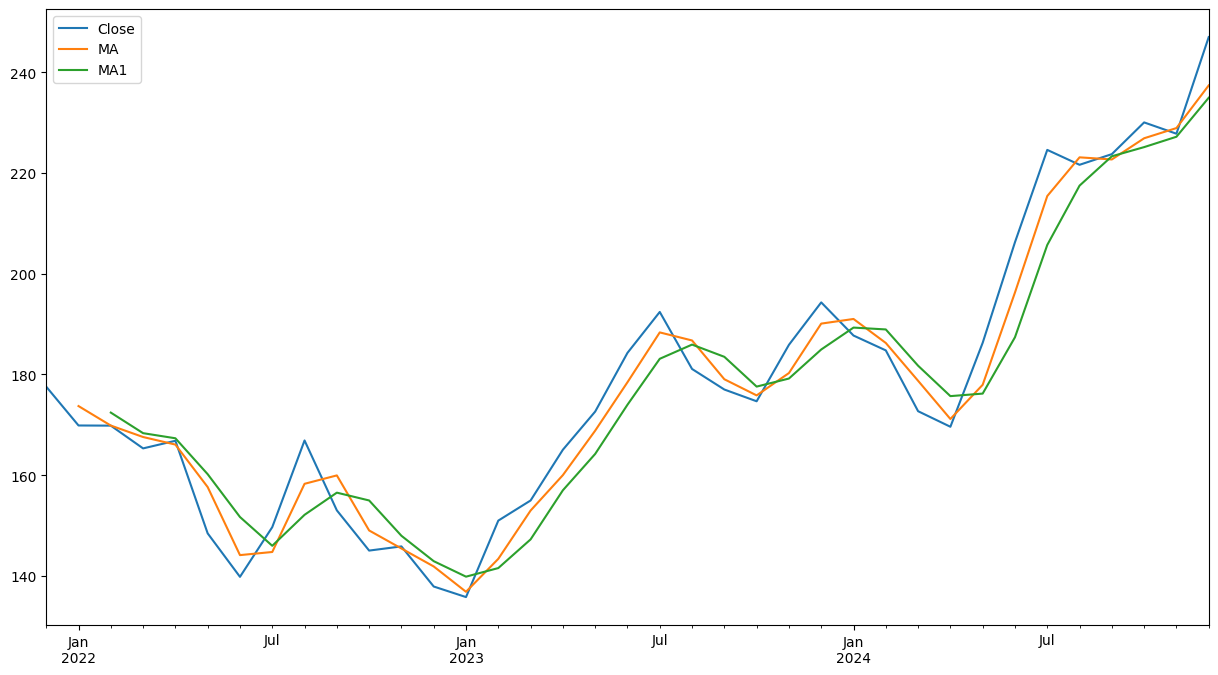

In [64]:
# 이동평균선
df_month["MA1"] = df_month["Close"].rolling(3).mean()
df_month.iloc[:, [3, 7, 8]].plot(figsize=(15, 8))

In [71]:
last_close = df_month["MA"].iloc[-2]  # 이동평균선 60일 전 종가
print(last_close)
price = df_month["Close"].iloc[-1]  # 오늘 종가
print(price)

if price > last_close:
    print("상승장")
elif price < last_close:
    print("하락장")
else:
    print("변화없음")

228.93329306892727
247.00533243815104
상승장


In [73]:
# 애플 데이터 저장하기
df_month.to_csv("apple_data.csv")